In [2]:
import pandas as pd
df=pd.read_csv('/content/Load_data_new.csv')
df

,Time,air_pressure[mmHg],air_temperature[degree celcius],relative_humidity[%],wind_speed[M/S],solar_irridiation[W/m²],total_cloud_cover[from ten],electricity_demand_values[kw],heat_demand_values[kw]
0,2010-12-01 00:00:00,729.7,25.0,85.0,5.0,0,no clouds,289.567557,432.940036
1,2010-12-01 01:00:00,729.4,27.8,77.0,7.0,0,no clouds,260.168520,473.935901
2,2010-12-01 02:00:00,728.9,33.3,62.0,7.0,0,2/10–3/10.,247.273585,483.278761
3,2010-12-01 03:00:00,731.6,32.2,62.0,2.0,0,5/10.,257.955878,545.921252
4,2010-12-01 04:00:00,732.6,22.8,96.0,3.0,0,2/10–3/10.,258.255081,550.526112
...,...,...,...,...,...,...,...,...,...
70075,2018-11-28 19:00:00,733.3,24.4,60.0,3.0,262,no clouds,379.637300,626.192823
70076,2018-11-28 20:00:00,733.6,27.8,56.0,4.0,0,no clouds,369.976634,609.519358
70077,2018-11-28 21:00:00,732.1,38.3,22.0,0.0,0,no clouds,365.009491,571.465130
70078,2018-11-28 22:00:00,735.3,36.7,25.0,4.0,0,no clouds,396.966494,583.703242


In [3]:
df = df[['Time', 'air_temperature[degree celcius]', 'electricity_demand_values[kw]']]

# Display the first few rows of the updated DataFrame
print(df.head())

                  Time  air_temperature[degree celcius]  \
0  2010-12-01 00:00:00                             25.0   
1  2010-12-01 01:00:00                             27.8   
2  2010-12-01 02:00:00                             33.3   
3  2010-12-01 03:00:00                             32.2   
4  2010-12-01 04:00:00                             22.8   

   electricity_demand_values[kw]  
0                     289.567557  
1                     260.168520  
2                     247.273585  
3                     257.955878  
4                     258.255081  


In [4]:
df['air_temperature[degree celcius]'] = df['air_temperature[degree celcius]'].fillna(method='ffill')  # Forward fill
df['air_temperature[degree celcius]'] = df['air_temperature[degree celcius]'].interpolate(method='linear')  # Linear interpolation

df['electricity_demand_values[kw]'] = df['electricity_demand_values[kw]'].fillna(method='ffill')  # Forward fill


<ipython-input-4-d1f55ec5756f>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['air_temperature[degree celcius]'] = df['air_temperature[degree celcius]'].fillna(method='ffill')  # Forward fill
<ipython-input-4-d1f55ec5756f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['air_temperature[degree celcius]'] = df['air_temperature[degree celcius]'].fillna(method='ffill')  # Forward fill
<ipython-input-4-d1f55ec5756f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

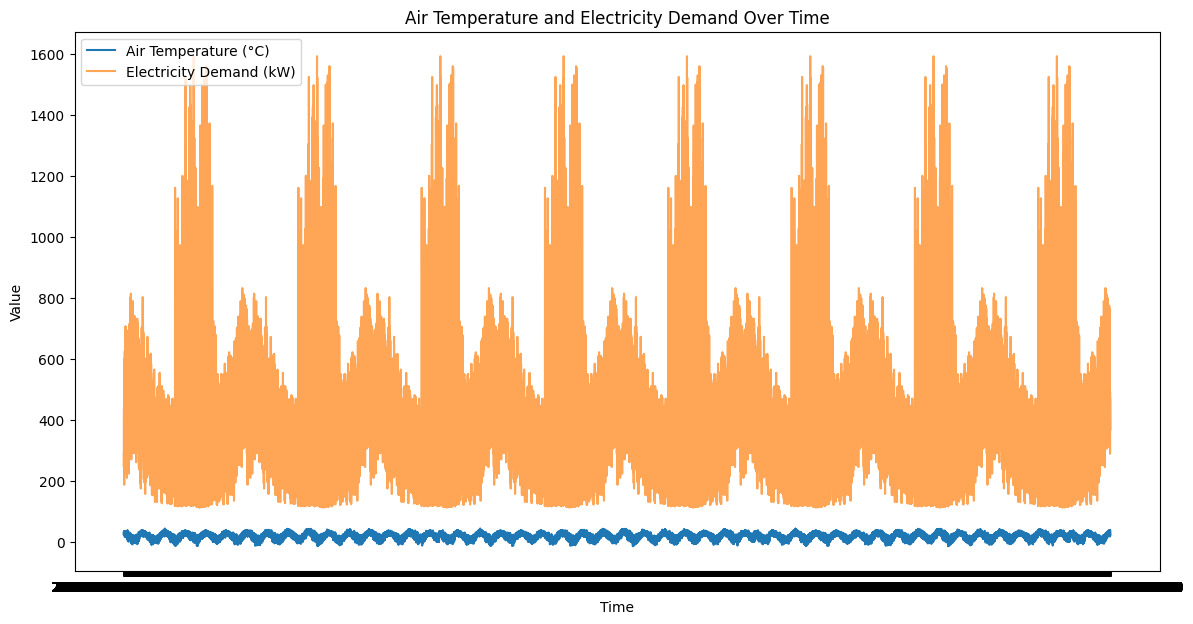

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot temperature and electricity demand over time
plt.figure(figsize=(14, 7))
plt.plot(df['Time'], df['air_temperature[degree celcius]'], label='Air Temperature (°C)')
plt.plot(df['Time'], df['electricity_demand_values[kw]'], label='Electricity Demand (kW)', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Air Temperature and Electricity Demand Over Time')
plt.legend()
plt.show()

In [6]:
heat_wave_threshold = 30  # Example threshold in °C
consecutive_days = 3

# Create a rolling window to identify heat waves
df['heat_wave'] = (df['air_temperature[degree celcius]'] > heat_wave_threshold).rolling(window=consecutive_days).sum() >= consecutive_days

# Convert boolean to integer
df['heat_wave'] = df['heat_wave'].astype(int)

# Verify the new feature
print(df[['Time', 'air_temperature[degree celcius]', 'heat_wave']].head(10))

                  Time  air_temperature[degree celcius]  heat_wave
0  2010-12-01 00:00:00                             25.0          0
1  2010-12-01 01:00:00                             27.8          0
2  2010-12-01 02:00:00                             33.3          0
3  2010-12-01 03:00:00                             32.2          0
4  2010-12-01 04:00:00                             22.8          0
5  2010-12-01 05:00:00                             24.4          0
6  2010-12-01 06:00:00                             30.0          0
7  2010-12-01 07:00:00                             26.1          0
8  2010-12-01 08:00:00                             22.8          0
9  2010-12-01 09:00:00                             23.3          0


<ipython-input-6-989a75af1e2d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['heat_wave'] = (df['air_temperature[degree celcius]'] > heat_wave_threshold).rolling(window=consecutive_days).sum() >= consecutive_days
<ipython-input-6-989a75af1e2d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['heat_wave'] = df['heat_wave'].astype(int)


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score

# Select features and target variable
features = ['air_temperature[degree celcius]',  'heat_wave']
target = 'electricity_demand_values[kw]'


In [10]:
# Split the data
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 58379.45337424804


Average Electricity Demand during Heat Waves: 400.98560647795773 kW
Average Electricity Demand during Non-Heat Wave Periods: 393.8528656923375 kW


<ipython-input-16-bcaa1866141a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Heat Wave', 'No Heat Wave'], y=[avg_demand_heat_wave, avg_demand_no_heat_wave], palette='viridis')


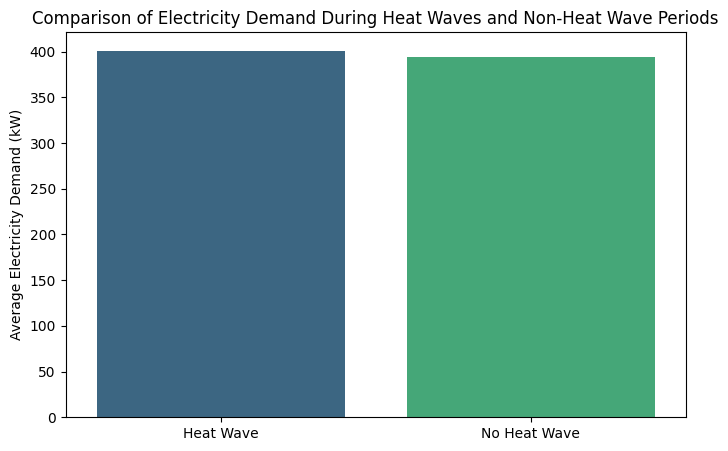

In [16]:
# Calculate average electricity demand during heat waves and non-heat wave periods
avg_demand_heat_wave = df[df['heat_wave'] == 1]['electricity_demand_values[kw]'].mean()
avg_demand_no_heat_wave = df[df['heat_wave'] == 0]['electricity_demand_values[kw]'].mean()

print(f'Average Electricity Demand during Heat Waves: {avg_demand_heat_wave} kW')
print(f'Average Electricity Demand during Non-Heat Wave Periods: {avg_demand_no_heat_wave} kW')

# Visualize the comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=['Heat Wave', 'No Heat Wave'], y=[avg_demand_heat_wave, avg_demand_no_heat_wave], palette='viridis')
plt.ylabel('Average Electricity Demand (kW)')
plt.title('Comparison of Electricity Demand During Heat Waves and Non-Heat Wave Periods')
plt.show()
